## Module 5 Practice - Bubble Charts

In this practice, we will create bubble charts in ggplot2 using the modular approach. We will also see how we could create them using standard R plots and plotly. A bubble chart is a special type of scatter plot where each point mark is encoded with usually two visual variables (e.g. color and size) to represent two attributes of a data point. A famous interactive and animated bubble chart is the Gapminder that you can see and interact [here](http://gapminder.org/tools). 

Let's start with the crime data.

In [6]:
library(ggplot2)
crime = read.csv("../../../datasets/crime.csv")

head(crime)

state       murder Forcible_rate Robbery aggravated_assult burglary
1 Alabama     8.2    34.3          141.4   247.8              953.8  
2 Alaska      4.8    81.1           80.9   465.1              622.5  
3 Arizona     7.5    33.8          144.4   327.4              948.4  
4 Arkansas    6.7    42.9           91.1   386.8             1084.6  
5 California  6.9    26.0          176.1   317.3              693.3  
6 Colorado    3.7    43.4           84.6   264.7              744.8  
  larceny_theft motor_vehicle_theft population
1 2650.0        288.3                4627851  
2 2599.1        391.0                 686293  
3 2965.2        924.4                6500180  
4 2711.2        262.1                2855390  
5 1916.5        712.8               36756666  
6 2735.2        559.5                4861515

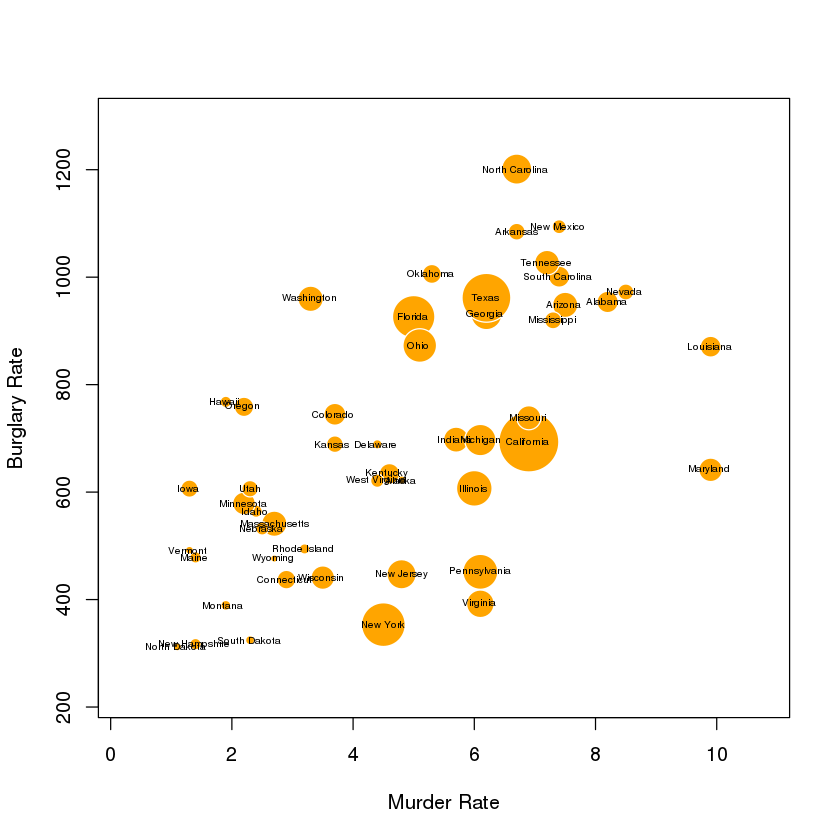

In [7]:
radius <- sqrt(crime$population/pi)
symbols(crime$murder,crime$burglary,circles=radius,inches=0.25,fg="white",bg="orange",xlab="Murder Rate",ylab="Burglary Rate")
text(crime$murder,crime$burglary,crime$state,cex=0.5)

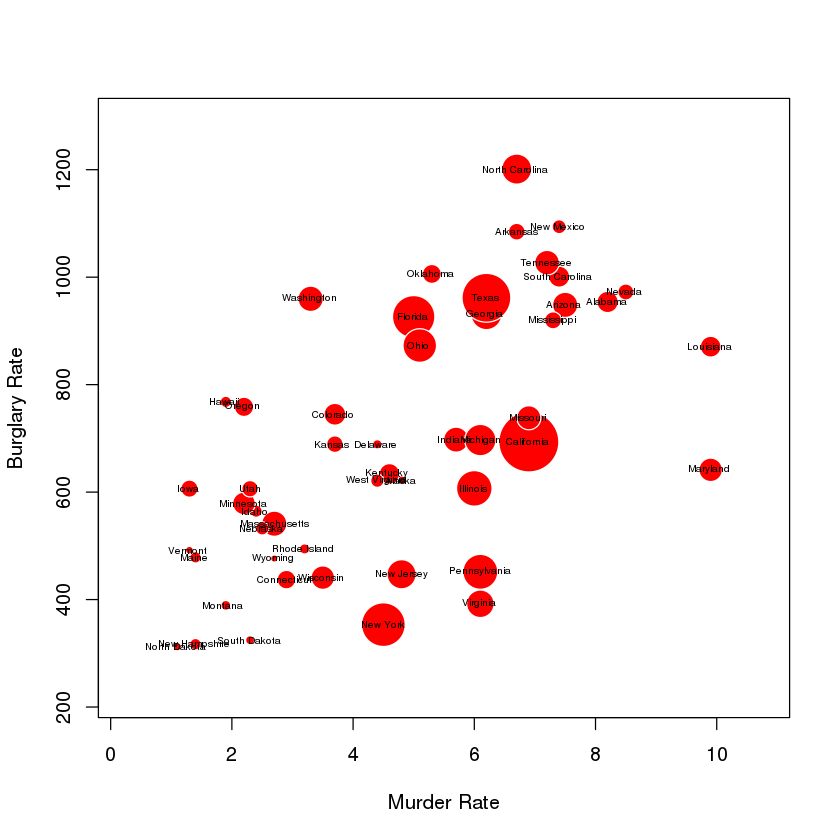

In [8]:
# This is how we would create it in R

# first compute the radius of the circles to represent population
radius <- sqrt(crime$population/pi)
# then draw symbols (in this case circles) given the two attributes as coordinates, and the third one as the size.
symbols(crime$murder, crime$burglary, circles=radius, inches=0.25, fg="white", bg="red", xlab="Murder Rate", ylab="Burglary Rate")
# Add state names to the plot
text(crime$murder, crime$burglary, crime$state, cex=0.5)

It is a short piece of code but in terms of modularity, it does not have separable components to separate data, transformation, visual mappings, etc. 
Let's do the same in plotly. 

In [11]:
library(plotly)
plot_ly(crime, x = ~murder, y = ~burglary, type = 'scatter', mode = 'markers',size = ~population,
       sizes = c(10,50), marker = list(opacity = 0.5, sizemode = 'diameter'),
       hoverinfo = 'text', text = ~paste(population)) %>%
        add_text(text = ~state, textposition = 'middle',size = 8)%>%
layout(title = 'Crime Rates by State',
      xaxis = list(title = 'Murder Rate'),
      yaxis = list(title = 'Burglary Rate'))

Warning message:
“plotly.js doesn't yet support textfont.size arrays”A marker object has been specified, but markers is not in the mode
Adding markers to the mode...


HTML widgets cannot be represented in plain text (need html)

In [10]:
library(plotly)
plot_ly(crime, x = ~murder, y = ~burglary, type = 'scatter', mode = 'markers', size = ~population,
        sizes = c(10, 50), marker = list(opacity = 0.5, sizemode = 'diameter'),
        hoverinfo = 'text', text = ~paste(population)) %>%
        add_text(text = ~state, textposition = 'middle', size = 8) %>%
 layout(title = 'Crime Rates by State',
         xaxis = list(title = 'Murder Rate'),
         yaxis = list(title = 'Burglary Rate'))

Warning message in arrange_impl(.data, dots):
“'.Random.seed' is not an integer vector but of type 'NULL', so ignored”Warning message:
“plotly.js doesn't yet support textfont.size arrays”A marker object has been specified, but markers is not in the mode
Adding markers to the mode...


HTML widgets cannot be represented in plain text (need html)

Plotly is a little better; we can have separate *traces* that act like layers. 

Let's create the same plot with ggplot2. 

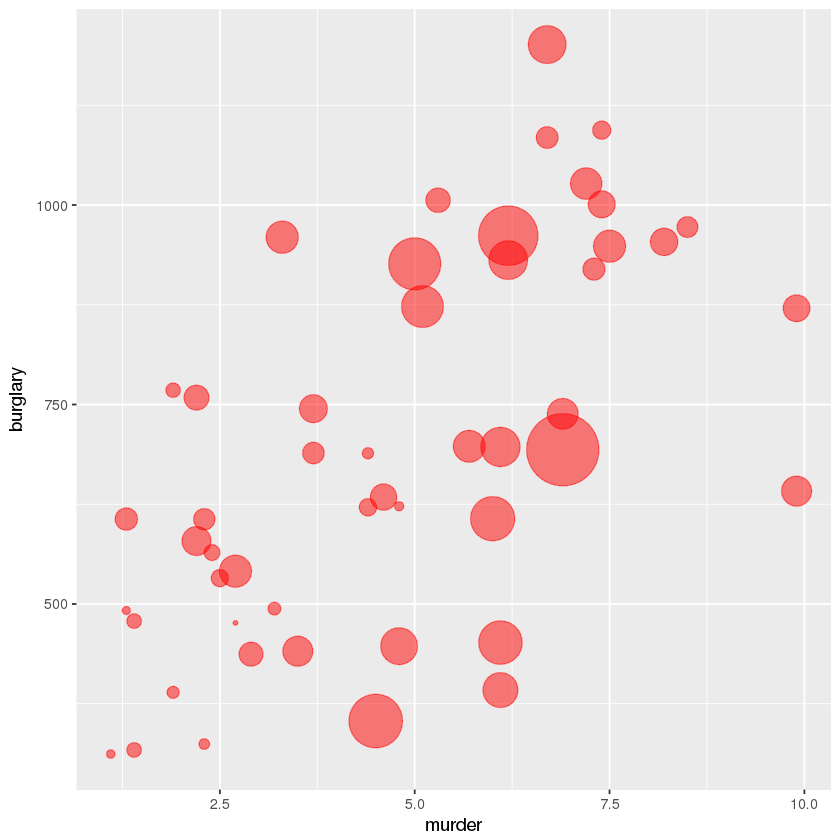

In [11]:
# It is a scatter plot, so we'll use geom_point(). We'll encode murder and burglary as position, and population as size.
ggplot(crime, aes(x=murder, y=burglary, size=population)) + geom_point(colour="red",alpha=0.5) + scale_size(range = c(1,20)) +
theme(legend.position="none")

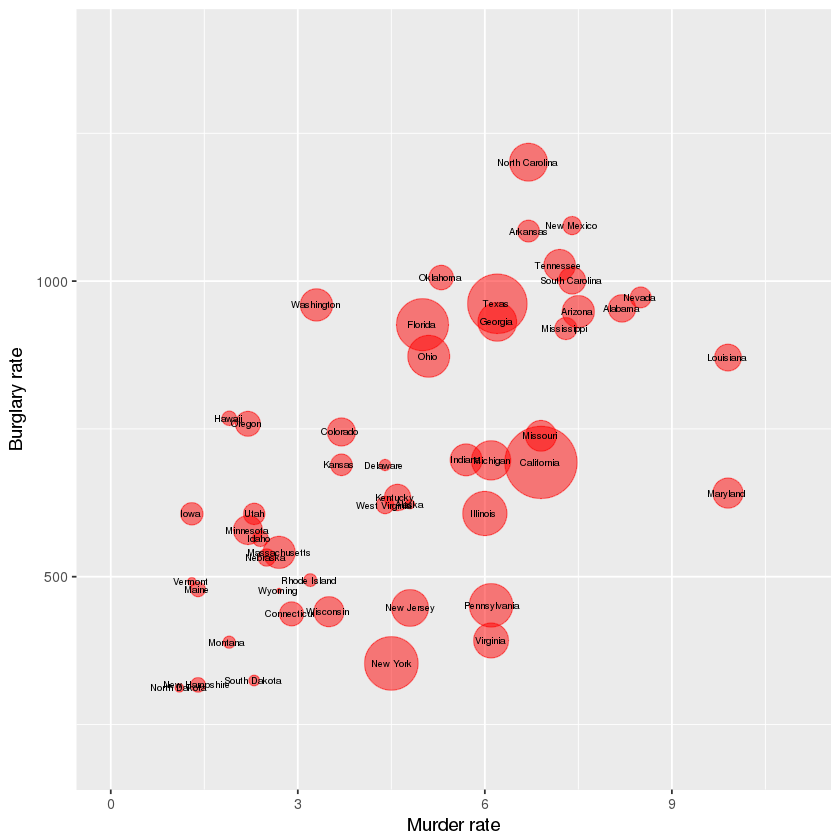

In [12]:
# Add state names as a separate layer using geom_text, and the axus labels 
ggplot(crime, aes(x=murder, y=burglary, size=population)) + geom_point(colour="red",alpha=0.5) + scale_size(range = c(1,20)) +
geom_text(size=2, aes(label=state)) +
xlab("Murder rate") + ylab("Burglary rate") +
ylim(200,1400) + xlim(0,11) +
theme(legend.position="none")

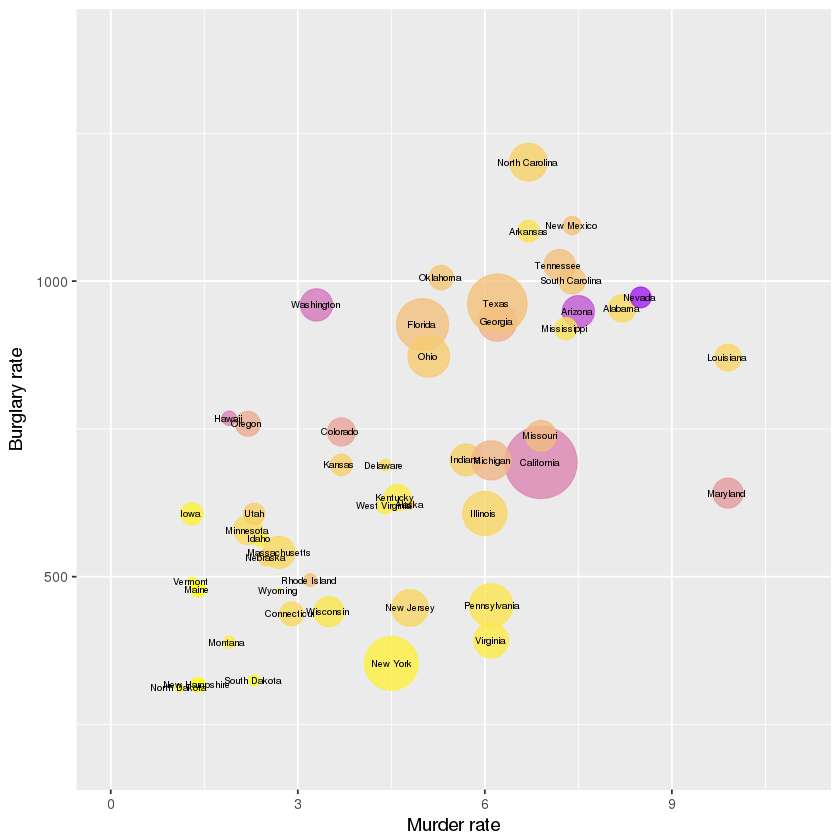

In [13]:
# We can add another visual variable: color will encode motor_vehicle_theft
ggplot(crime, aes(x=murder, y=burglary, size=population)) + geom_point(aes(colour=motor_vehicle_theft),alpha=0.8) + scale_size(range = c(1,20)) +
geom_text(size=2, aes(label=state)) +
xlab("Murder rate") + ylab("Burglary rate") +
ylim(200,1400) + xlim(0,11) +
scale_color_continuous(low="yellow", high="purple") +
theme(legend.position="none")

Hopefully, using the ggplot2 with separated components is easier to understand and code a variety of plots.